In [24]:
#129277 ICS 3A 

import pandas as pd

df_main = pd.read_csv('data.csv')

df1 = df_main.copy()
df1.head(5)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Female,42.0,0.0,0.0,Yes,Private,Rural,84.60,27.0,smokes,0
1,Male,77.0,0.0,0.0,Yes,Private,Urban,94.68,33.6,Unknown,0
2,Female,57.0,0.0,0.0,Yes,Govt_job,Urban,110.52,28.5,Unknown,1
3,Male,8.0,0.0,0.0,No,children,Urban,118.66,16.1,Unknown,0
4,Female,66.0,0.0,0.0,Yes,Self-employed,Urban,101.45,29.3,Unknown,1


In [25]:
print(df1.nunique())# no of unique values in each column
print('------' * 20 )
print(df1.dtypes)#doesn't require parameters, print data values in each column
print('------' * 20 )
print(df1.isnull().sum())#add blanks in each column and get the total
print('------' * 20 )
print(df1.shape)# no of rows and columns as a tuple


gender                  2
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               4
Residence_type          2
avg_glucose_level    3889
bmi                   342
smoking_status          4
stroke                  2
dtype: int64
------------------------------------------------------------------------------------------------------------------------
gender                object
age                  float64
hypertension         float64
heart_disease        float64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object
------------------------------------------------------------------------------------------------------------------------
gender                3
age                   1
hypertension          9
heart_disease        13
ever_married          4
work_t

In [26]:
# print no of rows and drop empty ones

print(df1.shape)
df1.dropna(inplace=True) #any row with empty value will be dropped
print(df1.shape) #check no of rows and columns after dropping empty ones


(4981, 11)
(4906, 11)


In [27]:
print(df1.isnull().sum())

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


In [28]:
print(df1.dtypes)

gender                object
age                  float64
hypertension         float64
heart_disease        float64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object


In [29]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

#encode anything that's an object
df1['gender'] = le.fit_transform(df1['gender'])
df1['ever_married'] = le.fit_transform(df1['ever_married'])
df1['work_type'] = le.fit_transform(df1['work_type'])
df1['Residence_type'] = le.fit_transform(df1['Residence_type'])
df1['smoking_status'] = le.fit_transform(df1['smoking_status'])

print(df1.dtypes)


gender                 int32
age                  float64
hypertension         float64
heart_disease        float64
ever_married           int32
work_type              int32
Residence_type         int32
avg_glucose_level    float64
bmi                  float64
smoking_status         int32
stroke                 int64
dtype: object


In [30]:
df1.head(4)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,42.0,0.0,0.0,1,1,0,84.60,27.0,3,0
1,1,77.0,0.0,0.0,1,1,1,94.68,33.6,0,0
2,0,57.0,0.0,0.0,1,0,1,110.52,28.5,0,1
3,1,8.0,0.0,0.0,0,3,1,118.66,16.1,0,0


In [31]:
#scaing data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
#using a 2d list
df1[['age', 'avg_glucose_level', 'bmi']] = scaler.fit_transform(df1[['age', 'avg_glucose_level', 'bmi']])
df1.head(4)


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,-0.062545,0.0,0.0,1,1,0,-0.474482,-0.218898,3,0
1,1,1.482195,0.0,0.0,1,1,1,-0.251349,0.752515,0,0
2,0,0.599487,0.0,0.0,1,0,1,0.099288,0.001878,0,1
3,1,-1.563148,0.0,0.0,0,3,1,0.279476,-1.823200,0,0


In [32]:
#specify the features and the target
x = df1.drop('stroke', axis=1)
y = df1['stroke']

print(x.shape)
print(y.shape)

(4906, 10)
(4906,)


In [33]:
#test_size = 0.2 
#random_state = 42 #whatever is in testing in first run should be the same even in 42nd run

import random
test_size = (random.randint(1, 50))/100
random_state = (random.randint(1, 50))
#split the data into training and testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=random_state)

print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)



(3090, 10)
(3090,)
(1816, 10)
(1816,)


In [34]:
#build the model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
knn_pred = knn.predict(x_test)


In [35]:
#generating a confusion matrix

from sklearn.metrics import confusion_matrix
cm_knn = confusion_matrix(y_test, knn_pred)#pass actual value and predicted value
print(cm_knn)


[[1719    9]
 [  85    3]]


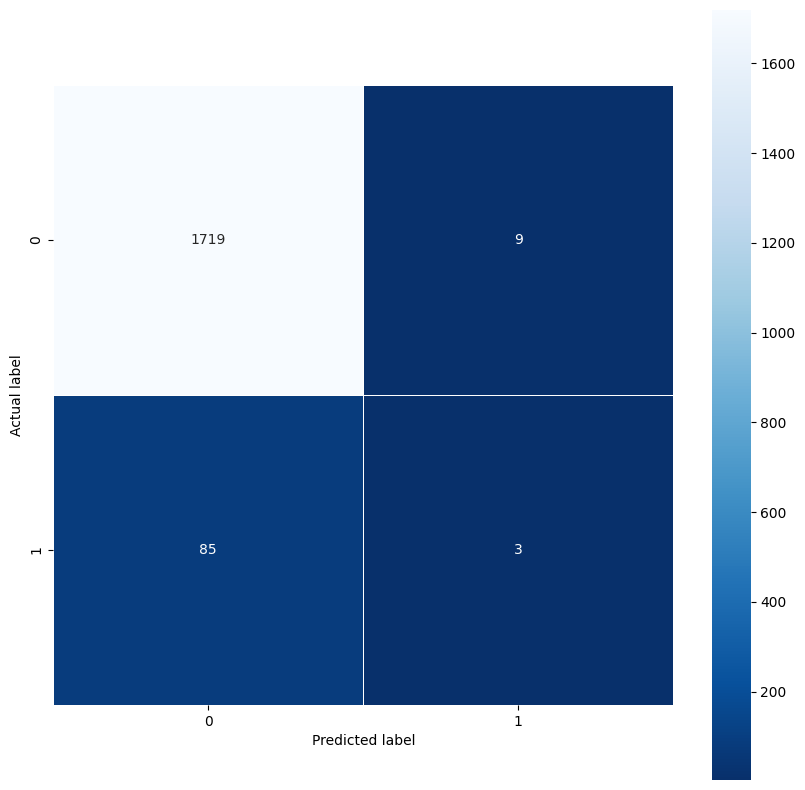

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 10))# 10 pixels by 10 pixels
sns.heatmap(cm_knn, annot=True, fmt='d', linewidths=0.5, square= True, cmap='Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [37]:
#save the image
plt.savefig('cm_knn.png')

<Figure size 640x480 with 0 Axes>

In [38]:
from sklearn.metrics import classification_report
print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1728
           1       0.25      0.03      0.06        88

    accuracy                           0.95      1816
   macro avg       0.60      0.51      0.52      1816
weighted avg       0.92      0.95      0.93      1816



In [39]:
print(((932 + 1)/(932 + 1 + 43 + 6)) *100)

95.01018329938901


In [21]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

""""
2 hidden layers 10 neurons each
1 output layer 1 neuron
1 input layer 10 neurons

"""

model=Sequential()
model.add(Dense(10,  activation='relu'))#relu ensures that the value is positive
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(2, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history= model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))


Epoch 1/10
123/123 [==============================] - 1s 3ms/step - loss: 0.2577 - accuracy: 0.9480 - val_loss: 0.1707 - val_accuracy: 0.9552
Epoch 2/10
123/123 [==============================] - 0s 2ms/step - loss: 0.1883 - accuracy: 0.9480 - val_loss: 0.1529 - val_accuracy: 0.9552
Epoch 3/10
123/123 [==============================] - 0s 2ms/step - loss: 0.1779 - accuracy: 0.9480 - val_loss: 0.1494 - val_accuracy: 0.9552
Epoch 4/10
123/123 [==============================] - 0s 2ms/step - loss: 0.1739 - accuracy: 0.9480 - val_loss: 0.1470 - val_accuracy: 0.9552
Epoch 5/10
123/123 [==============================] - 0s 2ms/step - loss: 0.1714 - accuracy: 0.9480 - val_loss: 0.1482 - val_accuracy: 0.9552
Epoch 6/10
123/123 [==============================] - 0s 2ms/step - loss: 0.1692 - accuracy: 0.9480 - val_loss: 0.1456 - val_accuracy: 0.9552
Epoch 7/10
123/123 [==============================] - 0s 2ms/step - loss: 0.1674 - accuracy: 0.9480 - val_loss: 0.1456 - val_accuracy: 0.9552
Epoch 

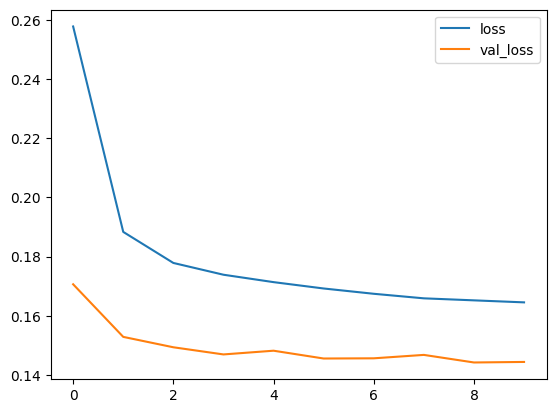

In [22]:
#how much information is being lost
plt.plot(history.history['loss'], label='loss') # from traning data
plt.plot(history.history['val_loss'], label='val_loss') # from validation data
plt.legend()
plt.show()

